In [12]:
# Jun 3rd 2022
# Author: Jose Bastias
# Description: Python code to interpolate over the claened data of Mary Wildman dataset. 
# Actions: 
#          1.- Read the original the cleaned data set as pickle
#          2.- Interpolate 
#          3.- Plot to verify that the interpolation is correct and save

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel
import pickle

plt.style.use('ggplot')
myColor  = ("#E3072A","#0A8974","#5FAECC","#E49C23","#E27520") # Darjeeling Color map

We load the data file that we generated with "01_clean_data.ipynb" and "01_clean_data_baro.ipynb"


In [14]:
# Load results

path = 'Results/pkl_files/'

with open(path + 'cleaned_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
with open(path + 'cleaned_data_baro.pkl', 'rb') as f:
    baro = pickle.load(f)

Resample in hourly basis

In [15]:
keys = data.keys()

int_data = {}
for i, key in enumerate(keys):

    df = data[key]
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    # Resampling
    df = df.resample('60T').mean()
    # Interpolation
    df = df.interpolate(method='polynomial', order=3)
    # save in dic
    int_data[key] = df
    
# Resampling
baro['date'] = pd.to_datetime(baro['date'])
baro = baro.set_index('date')
baro = baro.resample('60T').mean()
# Interpolation
baro = baro.interpolate(method='polynomial', order=3)

Fix baro data to each head time serie

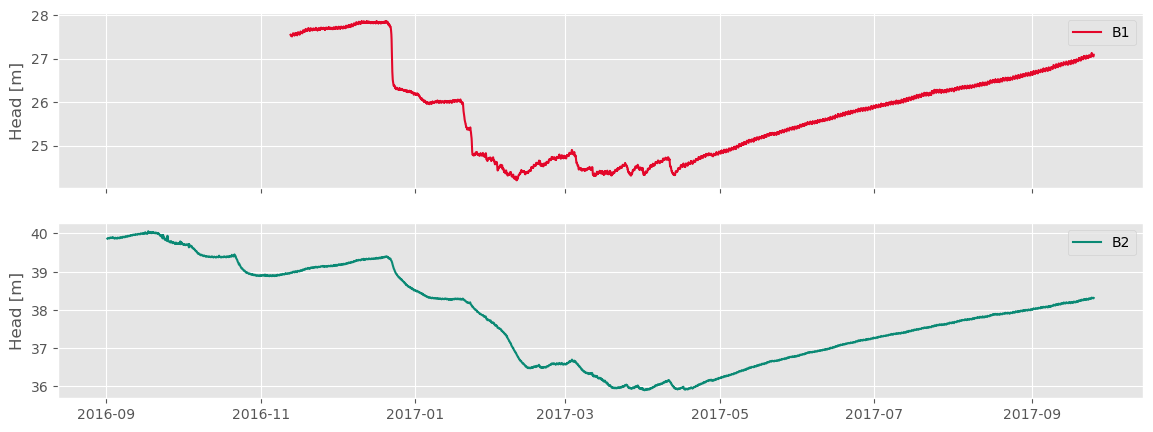

In [16]:
fix_data = {}

fig, ax = plt.subplots(nrows= len(keys),ncols=1,figsize=(14.0,5.0), sharex = True) # ,sharey=True

for i, key in enumerate(keys):
    df = int_data[key]
    res = baro.merge(df, left_index=True, right_on='date')
    fix_data[key] = res
    
    # plot
    ax[i].plot(res.index,res['head[m]'],label = key, color=myColor[i])
    ax[i].set_ylabel('Head [m]')  
    ax[i].legend()

In [17]:
# Save data

path = 'Results/pkl_files/'

with open(path + 'interpolated_data_baro.pkl', 'wb') as f:
    pickle.dump(fix_data, f)